#### Introduction
I am going to use Mall Customer Segmentation dataset from Kaggle to create clusters using K-means to group customers in order to implement marketing strategies.

#### About Dataset

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

Link: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

#### Import libraries and load the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import joblib

import os
os.environ["LOKY_MAX_CPU_COUNT"] = "6"

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Mall_Customers.csv")

#### Exploratory Data Analysis

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop(columns="CustomerID", inplace=True)

In [5]:
df = df.rename(columns={"Gender": "gender", 
                        "Age": "age",
                        "Annual Income (k$)": "annual_income",
                        "Spending Score (1-100)": "spending_score" })

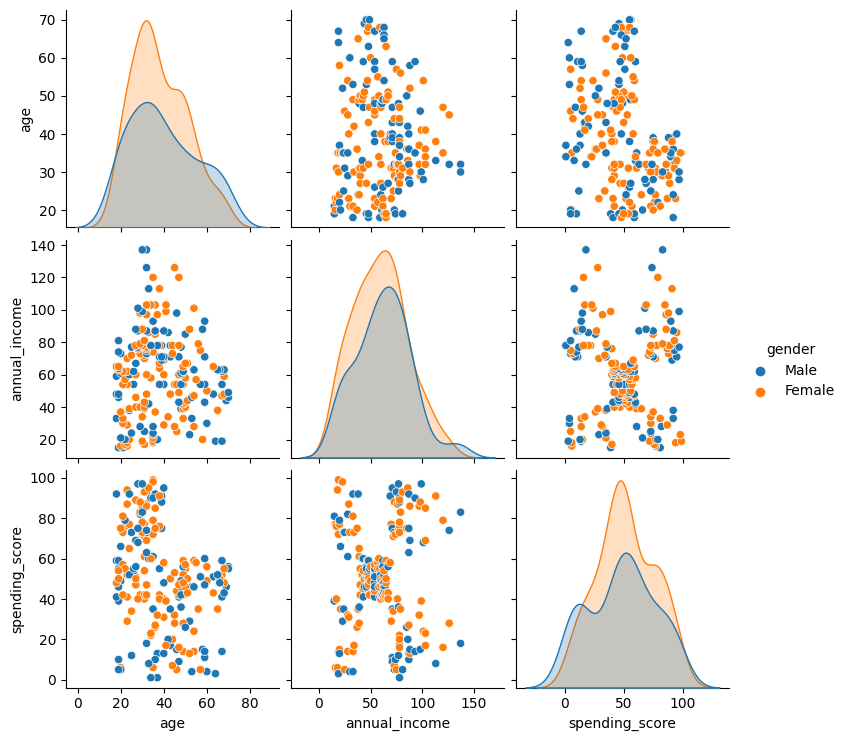

In [6]:
sns.pairplot(df, hue='gender');

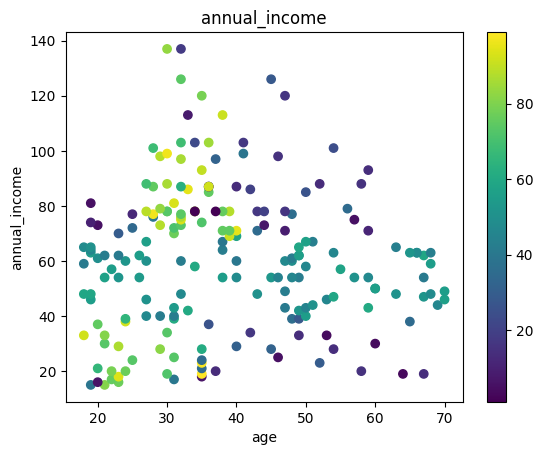

In [7]:
plt.figure()
scatter = plt.scatter(df.age, df.annual_income, c=df.spending_score)
plt.colorbar(scatter)
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('annual_income')
plt.show()

In [8]:
dummies = pd.get_dummies(df.gender).astype(int)

df["female"] = dummies.Female
df["male"] = dummies.Male

df.drop(columns="gender", inplace=True)

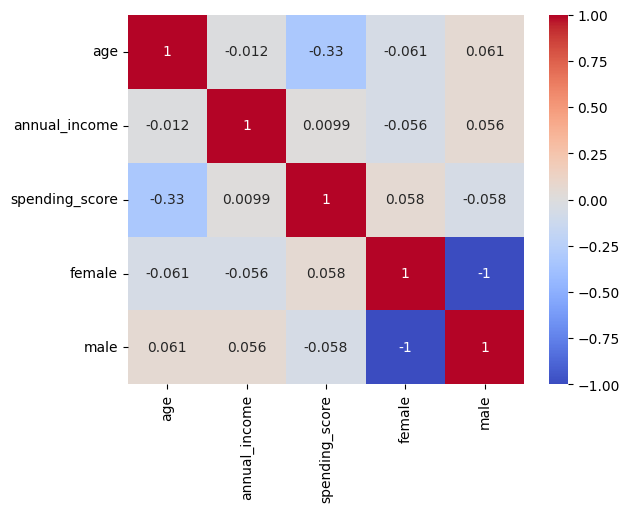

In [9]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm');

#### Elbow Method

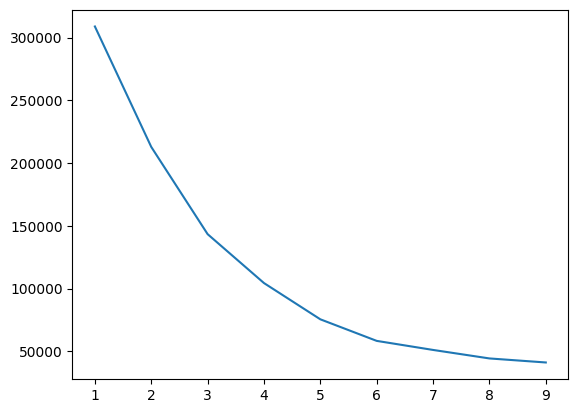

In [10]:
sse = []  # Sum of Square Error
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
plt.plot(range(1,10), sse);

In [11]:
x = df[["annual_income", "spending_score"]]

#### KMeans Models

In [12]:
model = KMeans(n_clusters=5)
model.fit(x)

KMeans(n_clusters=5)

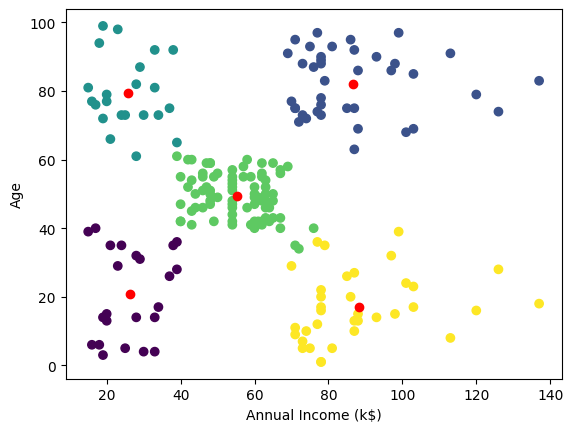

In [13]:
plt.scatter(df.annual_income, df.spending_score, c=model.predict(x));
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color="red");
plt.xlabel("Annual Income (k$)")
plt.ylabel("Age");

In [14]:
x = df[["age", "annual_income", "spending_score"]]

model = KMeans(n_clusters=5)
model.fit(x)

cluster_centers = model.cluster_centers_

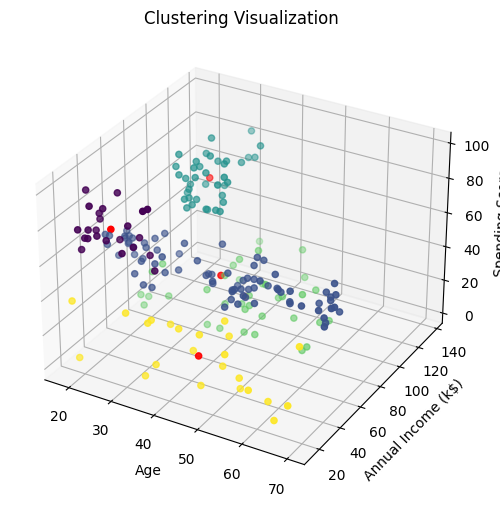

In [15]:
plt.figure(figsize=(6, 6))
ax = plt.axes(projection="3d")
ax.scatter(df.age, df.annual_income, df.spending_score, c=model.predict(x))
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], color="red")
plt.title("Clustering Visualization")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score");

In [16]:
joblib.dump(model, "km_model.pkl")

['km_model.pkl']

In [17]:
df["customer_type"] = model.predict(x)
df.head()

,age,annual_income,spending_score,female,male,customer_type
0,19,15,39,0,1,4
1,21,15,81,0,1,0
2,20,16,6,1,0,4
3,23,16,77,1,0,0
4,31,17,40,1,0,4


In [18]:
df.to_csv('processed_data.csv')

#### Logistic Regression Model to predict customer type

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="customer_type"), df.customer_type, test_size=0.2)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9

In [21]:
joblib.dump(model, "lr_model.pkl")

['lr_model.pkl']

#### Customer Type Analysis

In [22]:
grouped_df = df.groupby("customer_type", as_index=False).mean()

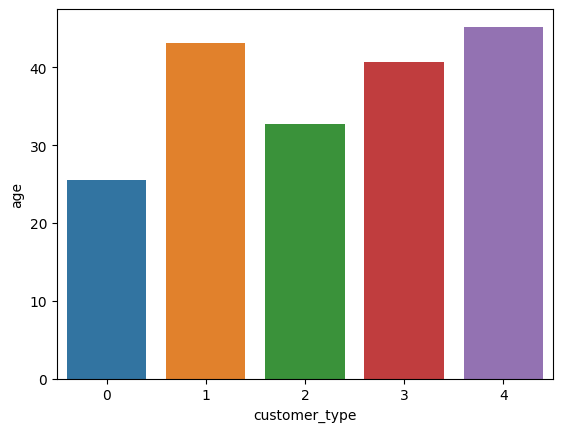

In [23]:
sns.barplot(x='customer_type', y='age',data=grouped_df);

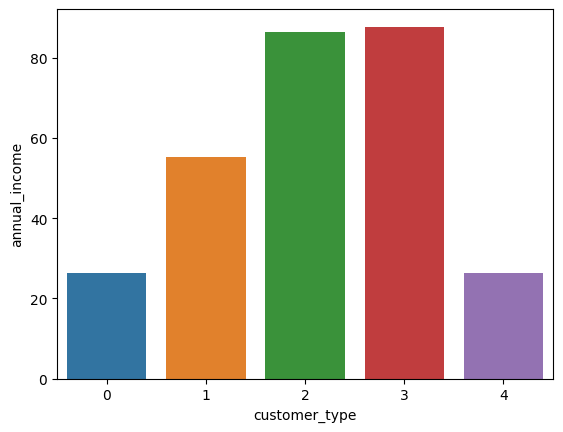

In [24]:
sns.barplot(x='customer_type', y='annual_income',data=grouped_df);

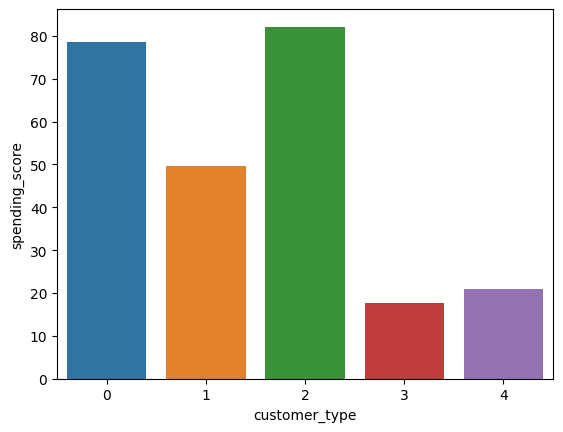

In [25]:
sns.barplot(x='customer_type', y='spending_score',data=grouped_df);

#### Conclusion

Customer Type 0: Young individuals with a high spending score despite having a low annual income.

Customer Type 1: Middle-aged individuals with a high annual income and medium spending score.

Customer Type 2: Middle-aged individuals with both a high annual income and a high spending score.

Customer Type 3: Older individuals with a high annual income but low spending score.

Customer Type 4: Older individuals with low spending score and also low annual income.

This information can be useful for targeted marketing strategies, product/service customization, pricing strategies, and resource allocation. It helps in concentrating marketing efforts to different customer types based on their spending behavior, income level, and age, thereby maximizing the effectiveness of marketing campaigns and improving overall customer satisfaction and retention.